<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging <br/> Présentation des résultats algorithmique</h1>

In [1]:
#chargement des corpus en mémoire

import dataAnalysis as da
import matplotlib.pyplot as plt
import numpy as np
da.init()

Initialization...
	Preparing corpus fr.foot.test.json...
	Done
	Preparing corpus fr.gsd.test.json...
	Done
	Preparing corpus fr.sequoia.train.json...
	Done
	Preparing corpus fr.ftb.test.json...
	Done
	Preparing corpus fr.ftb.dev.json...
	Done
	Preparing corpus fr.spoken.test.json...
	Done
	Preparing corpus fr.pud.train.json...
	Done
	Preparing corpus fr.spoken.train.json...
	Done
	Preparing corpus fr.natdis.test.json...
	Done
	Preparing corpus fr.partut.dev.json...
	Done
	Preparing corpus fr.sequoia.test.json...
	Done
	Preparing corpus fr.gsd.dev.json...
	Done
	Preparing corpus fr.sequoia.dev.json...
	Done
	Preparing corpus fr.gsd.train.json...
	Done
	Preparing corpus fr.pud.test.json...
	Done
	Preparing corpus fr.ftb.train.json...
	Done
	Preparing corpus fr.partut.test.json...
	Done
	Preparing corpus fr.partut.train.json...
	Done
	Preparing corpus fr.spoken.dev.json...
	Done
Done!


# Statistique des corpus

In [ ]:
#itère sur chacun des corpus
def iterateCorpus(f, printing = True):
    for nameCorpus, corpus in da.listeCorpus.items():
        if printing:
            print("corpus : ", nameCorpus)
        for typeDS, dataset in corpus.getDataset().items():
            if printing:
                print("ensemble ", typeDS)
            f(dataset, nameCorpus, typeDS)

# met à jour les données statistiques
def updateStat(dataset, nm, tds):
    dataset.updateStat()

# affiche les statistiques basique


def printBasicStat(dataset, nm, tds):
    #baseStat.append((nm + " " + tds, len(dataset.data), dataset.nbWord, dataset.nbUniqueWords))
    print("   nombre de phrase : ", len(dataset.data))
    print("   nombre de mot : ", dataset.nbWord)
    print("   nombre de mot unique : ", dataset.nbUniqueWords)


    

# affiche les 10 mots / labels les plus fréquents de chaque corpus
def printMostFrequent(dataset, nm, tds):
    print()
    print("10 mots les plus fréquents : ")
    print(dataset.mostFrequentWord)
    print()
    print()
    print("labels les plus fréquents : ")
    print(dataset.mostFrequentLabel)
    print()
    
# affiche les 10 mots les plus ambigu de chaque corpus
def printMostAmbiguousWord(dataset, nm, tds):
    ambiguousDict, ambiguousWord = dataset.ambiguousWord()
    
    def sortSecond(val):
        return len(val[1])
    
    ambiguousWord.sort(key = sortSecond, reverse = True)
    
    print()
    print("5 mots les plus ambigu : ", ambiguousWord[:5])
    print()
    
iterateCorpus(updateStat, False)

In [ ]:
#baseStat = []

iterateCorpus(printBasicStat)

from tabulate import tabulate

#print(tabulate(baseStat, tablefmt="latex", floatfmt=".2f"))

In [ ]:
iterateCorpus(printMostFrequent)

In [ ]:
#mot les plus ambigu de chaque corpus

iterateCorpus(printMostAmbiguousWord)

## Out Of Vocabulary Word

In [ ]:
# Calcul des Out of Vocabulary Words
oovLatex = []


footTest = da.listeCorpus['foot'].testDataSet
natdisTest = da.listeCorpus['natdis'].testDataSet


for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        oovResult = corpus.computeCorpusOOV()
        oovResultFoot = corpus.computeOOV(footTest)
        oovResultnatdis = corpus.computeOOV(natdisTest)
        print(nameCorpus, " : ")
        print("     Pourcentage de l'oov entre train et test : ", oovResult[0])
        print("     Pourcentage de l'oov entre train et dev : ", oovResult[1])
        print("     Pourcentage de l'oov entre train et footTest : ", oovResultFoot)
        print("     Pourcentage de l'oov entre train et natdisTest : ", oovResultnatdis)
        latexRows = (nameCorpus, oovResult[0], oovResult[1], oovResultFoot, oovResultnatdis)
        oovLatex.append(latexRows)

print(tabulate(oovLatex, tablefmt="latex"))

## Divergence de Kullback-Leibler

In [ ]:
# Calcul des divergence de KullBack-Leibler

latexDKL = []

for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        print(nameCorpus + " : ")
        DKLResult = corpus.computeCorpusKLDivergence()
        DKLFootresult = corpus.computeKLDivergence(footTest)
        DKLnatdisResult = corpus.computeKLDivergence(natdisTest)
        print("     Dkl(test||train) = ", DKLResult)
        print("     Dkl(footTest||train) = ", DKLFootresult)
        print("     Dkl(natdisTest||train) = ", DKLnatdisResult)
        latexDKL.append( (nameCorpus, DKLResult, DKLFootresult, DKLnatdisResult) )
        
        
print(tabulate(latexDKL, tablefmt="latex"))

# Perplexity

In [ ]:
latexPerplexity = []

print("                         train,                   test,              dev")
for nameCorpus, corpus in da.listeCorpus.items():
    print(nameCorpus, " : ")
    pp_res = corpus.computePerplexityCorpus()
    print("     perplexity : ", pp_res)
    latexRow = []
    latexRow.append(nameCorpus)
    if type(pp_res) == tuple:
        for i in pp_res:
            latexRow.append(i)
    else:
        latexRow.append(pp_res)
    latexPerplexity.append( latexRow )
    
print(tabulate(latexPerplexity, tablefmt="latex"))

# Training Model
## Decision Tree Classifier

### Validation croisée detection des meilleurs hyper-paramètre

In [3]:
import modelAnalysis as ma
import DecisionTreeClassifier as dtree
import features as ft

trainSet or testSet for corpus foot not available
Beginning of the model analysis between  sequoia  train and  sequoia  test
split_criterion :  gini  / gen_test :  median
      training time :  0.16129732131958008
      Max depth :  1 score on train :  33.55093242226425   Actual score on test :  33.13141683778234  Highscore !!
      training time :  0.33096814155578613
      Max depth :  2 score on train :  35.96079149126553   Actual score on test :  35.59548254620123  Highscore !!
      training time :  0.45343494415283203
      Max depth :  3 score on train :  41.57769507656641   Actual score on test :  41.28336755646817  Highscore !!
      training time :  0.6045036315917969
      Max depth :  4 score on train :  47.46303865942692   Actual score on test :  47.002053388090346  Highscore !!
      training time :  0.7209985256195068
      Max depth :  5 score on train :  51.76417952941655   Actual score on test :  51.04722792607803  Highscore !!
      training time :  1.103799343109130

      training time :  0.47067928314208984
      Max depth :  3 score on train :  41.57769507656641   Actual score on test :  41.28336755646817  Highscore !!
      training time :  0.6067869663238525
      Max depth :  4 score on train :  46.40351412360442   Actual score on test :  45.52361396303902  Highscore !!
      training time :  0.7256114482879639
      Max depth :  5 score on train :  51.45303316860878   Actual score on test :  50.74948665297742  Highscore !!
      training time :  0.9308128356933594
      Max depth :  6 score on train :  56.34189494234641   Actual score on test :  55.780287474332646  Highscore !!
      training time :  1.2340123653411865
      Max depth :  7 score on train :  62.82106033799037   Actual score on test :  62.15605749486654  Highscore !!
      training time :  1.5823156833648682
      Max depth :  8 score on train :  68.44609846867183   Actual score on test :  67.8952772073922  Highscore !!
      training time :  2.070200204849243
      Max depth 

/home/fusroman/Documents/Informatique_et_Programmation/Intelligence Artificielle/M1_Intro_machine_learning/Projet/src/modelAnalysis.py:238: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


score on devDataSet sequoia is 89.37679967091732 with best param (17, 'entropy', 'median')
decisionTreeAnalysis on sequoia finished in 1547.208726644516 secondes
results graph can be shown in ../results/decisionTree/ location
Beginning of the model analysis between  spoken  train and  spoken  test
split_criterion :  gini  / gen_test :  median
      training time :  0.04868793487548828
      Max depth :  1 score on train :  19.094435527019797   Actual score on test :  18.76123876123876  Highscore !!
      training time :  0.09711360931396484
      Max depth :  2 score on train :  24.271000535045477   Actual score on test :  23.156843156843156  Highscore !!
      training time :  0.1629340648651123
      Max depth :  3 score on train :  32.38362760834671   Actual score on test :  30.0  Highscore !!
      training time :  0.22063875198364258
      Max depth :  4 score on train :  37.887907972177636   Actual score on test :  34.985014985014985  Highscore !!
      training time :  0.3217749

      Max depth :  3 score on train :  30.959069020866774   Actual score on test :  28.14185814185814  Highscore !!
      training time :  0.22800588607788086
      Max depth :  4 score on train :  38.249063670411985   Actual score on test :  33.01698301698301  Highscore !!
      training time :  0.4414482116699219
      Max depth :  5 score on train :  47.792937399678976   Actual score on test :  43.866133866133865  Highscore !!
      training time :  0.46519017219543457
      Max depth :  6 score on train :  56.26672017121456   Actual score on test :  52.58741258741259  Highscore !!
      training time :  0.6669049263000488
      Max depth :  7 score on train :  65.69689673622257   Actual score on test :  61.47852147852147  Highscore !!
      training time :  1.0520188808441162
      Max depth :  8 score on train :  73.16746923488496   Actual score on test :  67.97202797202797  Highscore !!
      training time :  1.501188039779663
      Max depth :  9 score on train :  79.35393258426

      training time :  0.36939287185668945
      Max depth :  5 score on train :  52.18230149202539   Actual score on test :  49.67685806611981  Highscore !!
      training time :  0.5782370567321777
      Max depth :  6 score on train :  56.13531126736409   Actual score on test :  51.02742563592676  Highscore !!
      training time :  0.6724491119384766
      Max depth :  7 score on train :  61.580346424284   Actual score on test :  54.57784406330267  Highscore !!
      training time :  0.9053618907928467
      Max depth :  8 score on train :  68.834676727834   Actual score on test :  59.91382881763195  Highscore !!
      training time :  1.3123466968536377
      Max depth :  9 score on train :  74.27113702623906   Actual score on test :  63.4435330184771  Highscore !!
      training time :  1.9270844459533691
      Max depth :  10 score on train :  79.83622020236666   Actual score on test :  66.03695418013092  Highscore !!
      training time :  2.9766576290130615
      Max depth :  

      training time :  1.3273594379425049
      Max depth :  9 score on train :  75.09003601440575   Actual score on test :  64.44195873726075  Highscore !!
      training time :  2.0208988189697266
      Max depth :  10 score on train :  80.63368204424627   Actual score on test :  68.31551909851686  Highscore !!
      training time :  3.0506505966186523
      Max depth :  11 score on train :  85.49133939290002   Actual score on test :  69.54594415444527  Highscore !!
      training time :  4.16860032081604
      Max depth :  12 score on train :  88.73263591150746   Actual score on test :  70.82194050874139  Highscore !!
      training time :  5.309612274169922
      Max depth :  13 score on train :  91.71239924541244   Actual score on test :  72.35479327201922  Highscore !!
      training time :  6.832200288772583
      Max depth :  14 score on train :  93.70605385011147   Actual score on test :  73.17093379733201  Highscore !!
      training time :  8.188648700714111
      Max depth 

      training time :  2.7532942295074463
      Max depth :  11 score on train :  84.093637454982   Actual score on test :  78.9662027833002  Highscore !!
      training time :  3.9589462280273438
      Max depth :  12 score on train :  87.77653918710341   Actual score on test :  82.0675944333996  Highscore !!
      training time :  5.818944692611694
      Max depth :  13 score on train :  90.99211113016635   Actual score on test :  83.26043737574552  Highscore !!
      training time :  7.060729265213013
      Max depth :  14 score on train :  93.46595781169611   Actual score on test :  85.8051689860835  Highscore !!
      training time :  8.96951413154602
      Max depth :  15 score on train :  95.180929514663   Actual score on test :  86.79920477137178  Highscore !!
      training time :  9.659358024597168
      Max depth :  16 score on train :  96.4199965700566   Actual score on test :  86.91848906560637  Highscore !!
      training time :  10.866503477096558
      Max depth :  17 s

      training time :  7.680321931838989
      Max depth :  15 score on train :  95.54107357228607   Actual score on test :  87.47514910536779  Highscore !!
      training time :  8.728537797927856
      Max depth :  16 score on train :  96.6429428914423   Actual score on test :  87.55467196819086  Highscore !!
      training time :  9.73948073387146
      Max depth :  17 score on train :  97.51757845995542   Actual score on test :  87.91252485089464  Highscore !!
      training time :  10.477261304855347
      Max depth :  18 score on train :  97.9849082490139   Actual score on test :  88.31013916500994  Highscore !!
      training time :  10.94072675704956
      Max depth :  19 score on train :  98.31932773109243   Actual score on test :  87.79324055666004
      training time :  11.103396654129028
      Max depth :  20 score on train :  98.5336991939633   Actual score on test :  87.75347912524852
      training time :  11.289825916290283
      Max depth :  21 score on train :  98.718

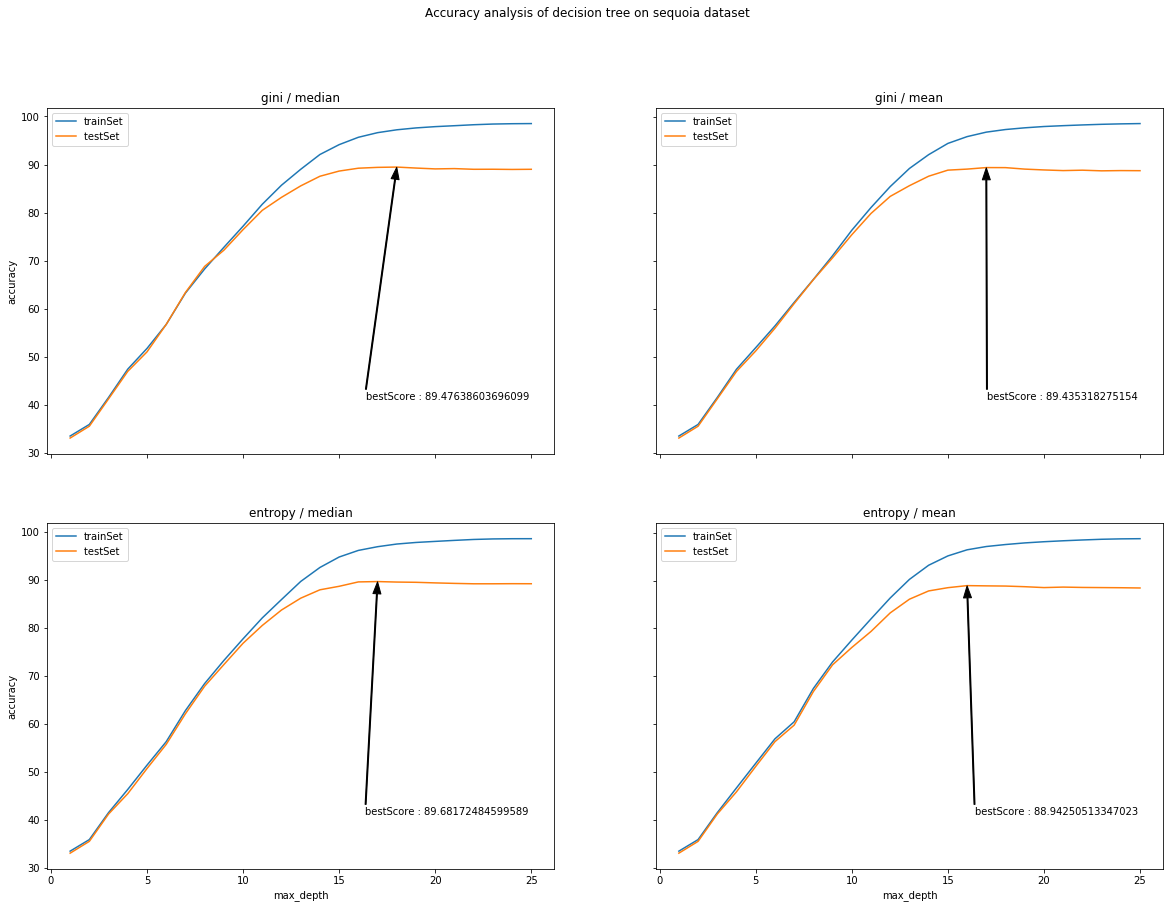

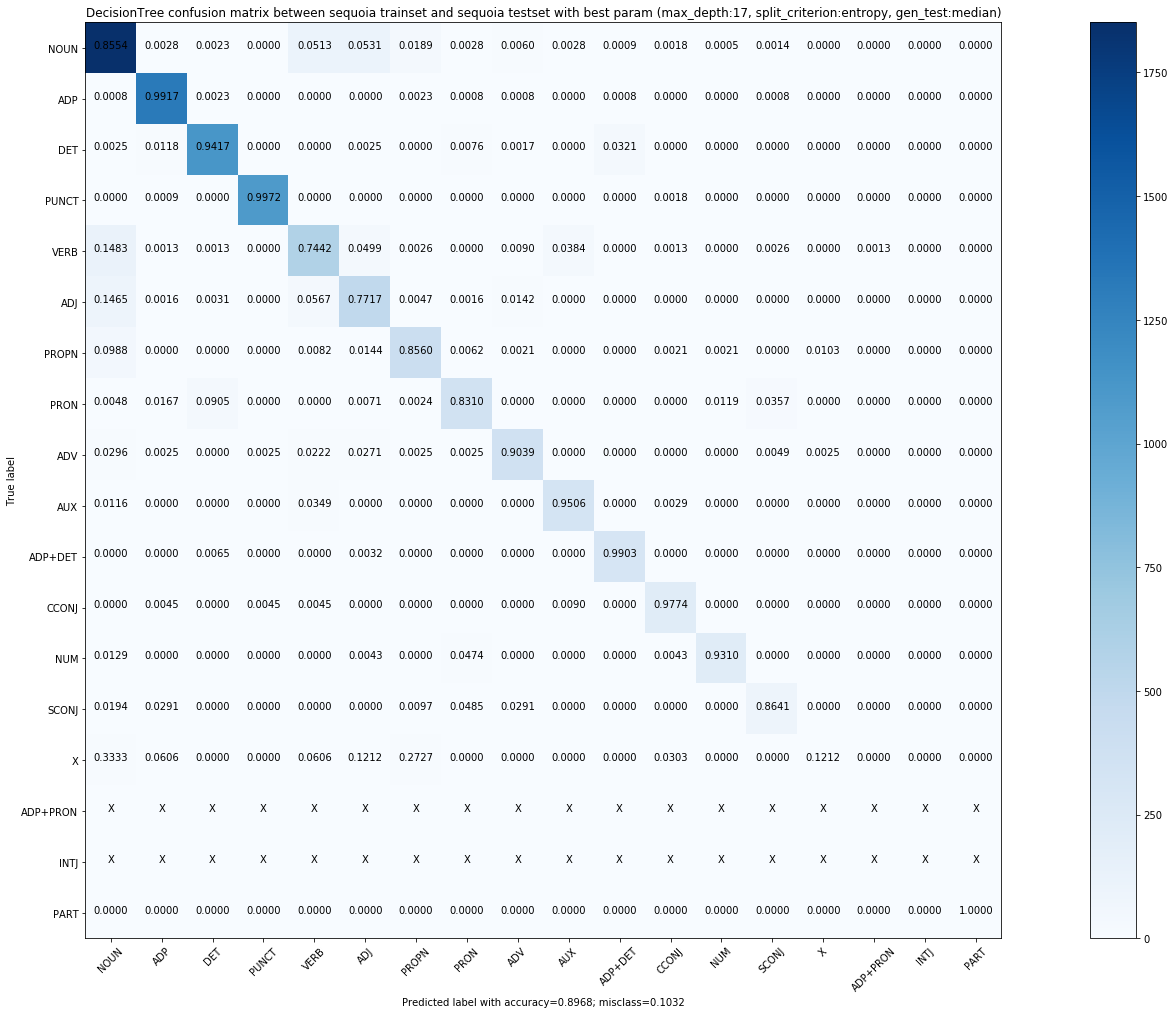

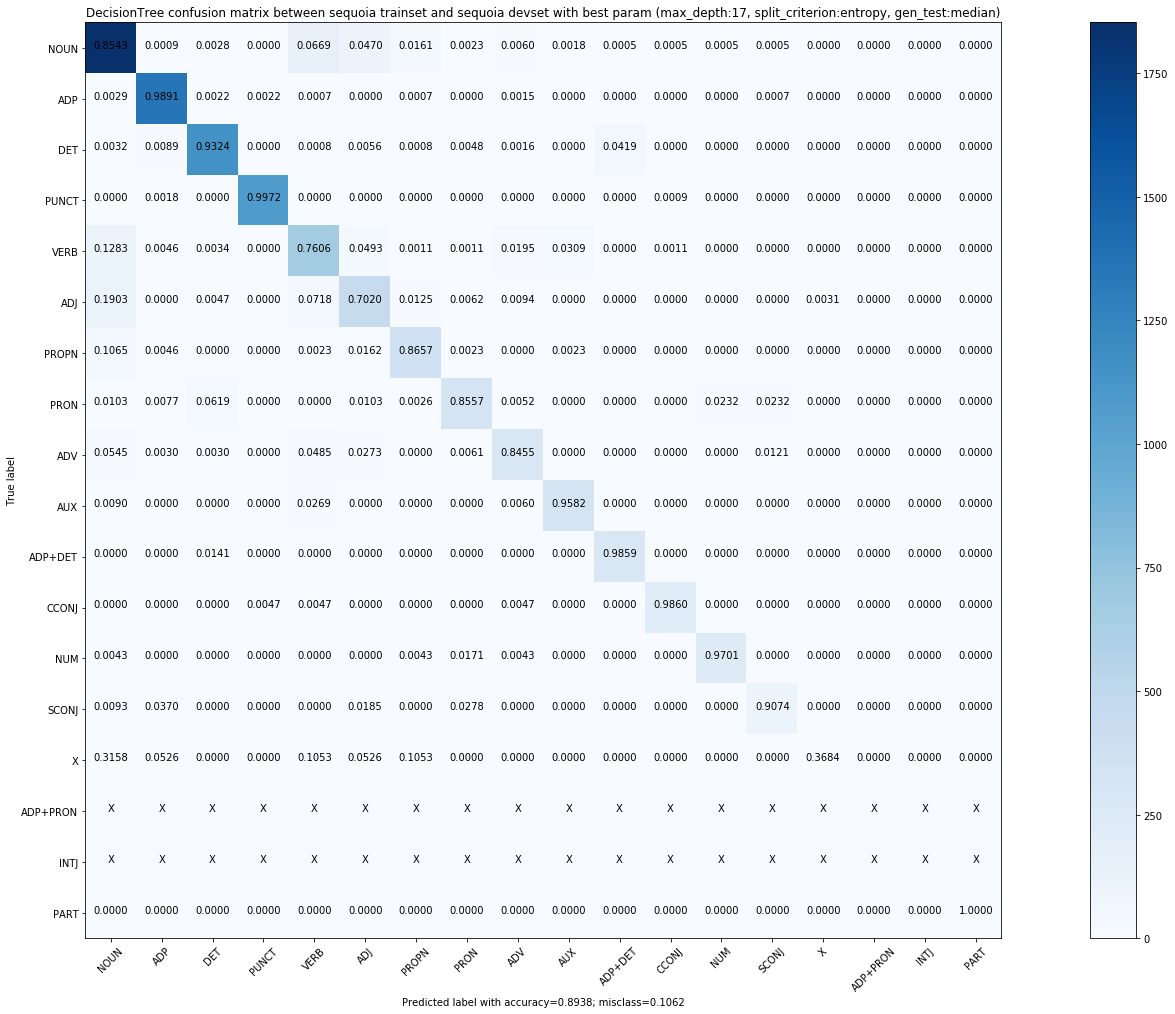

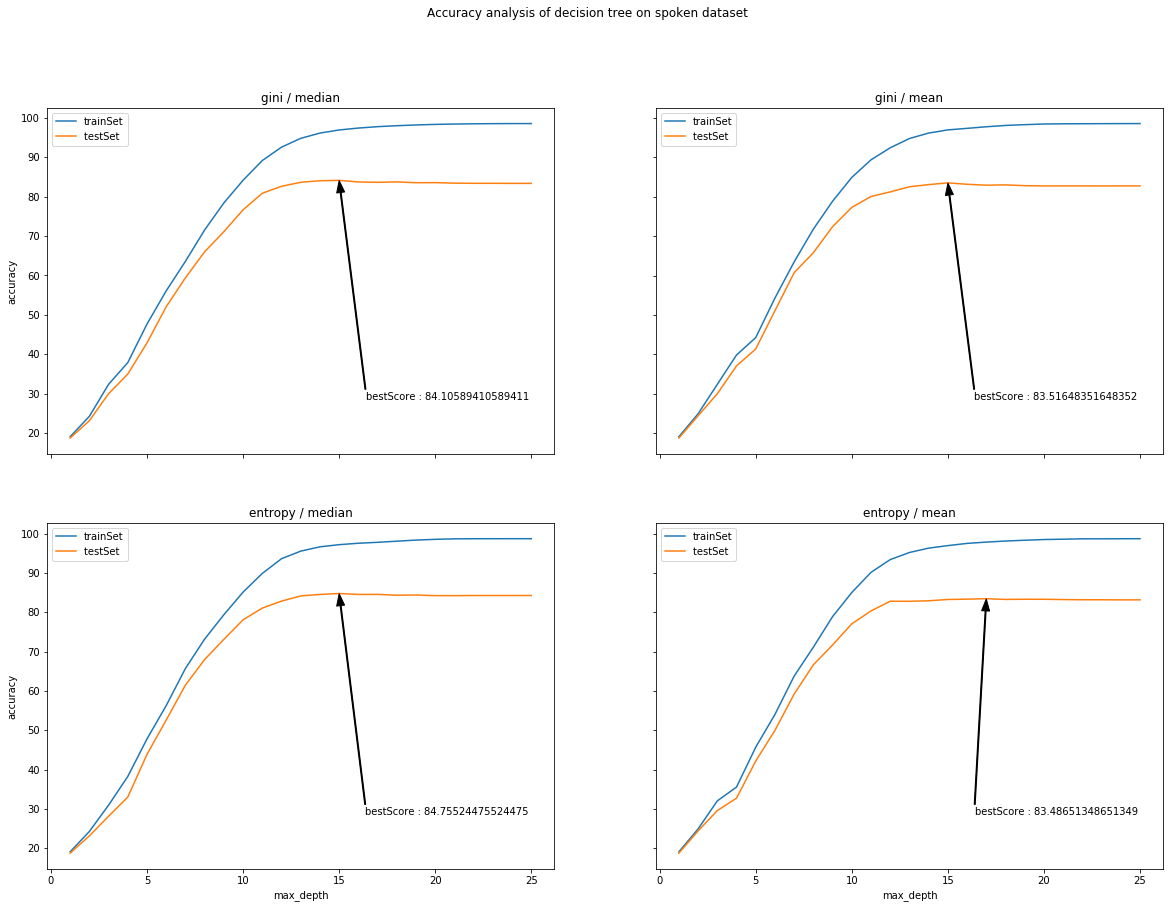

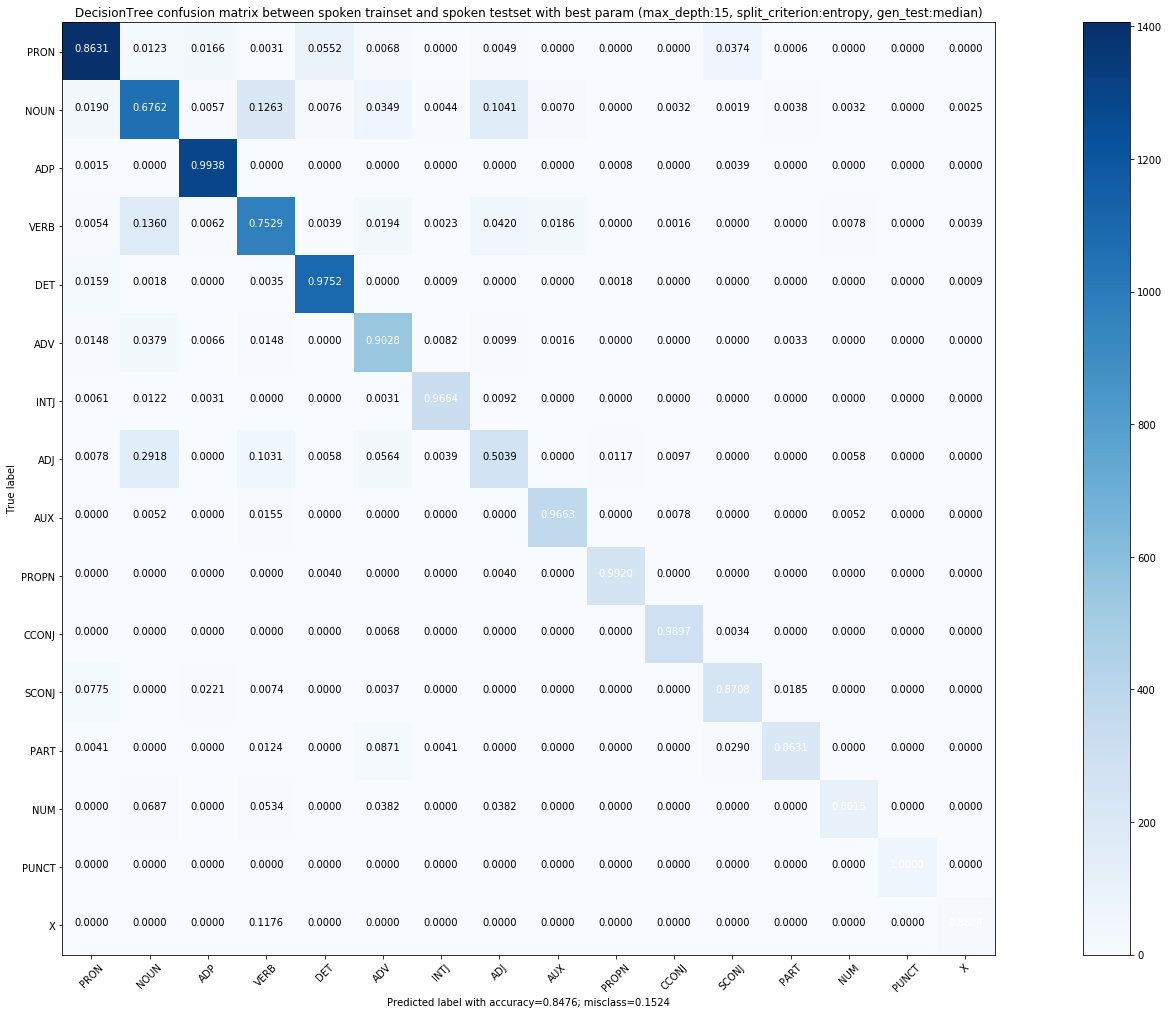

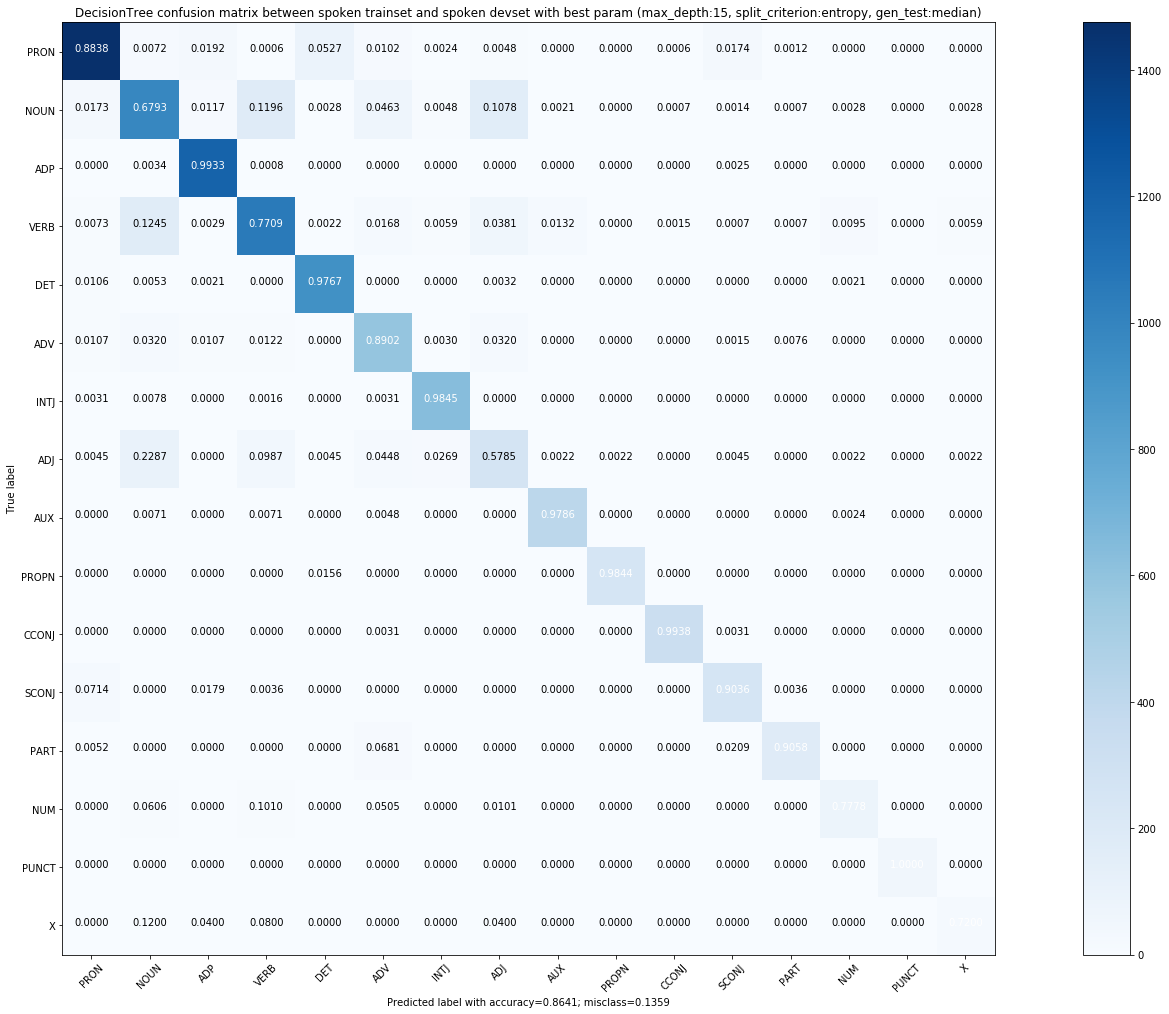

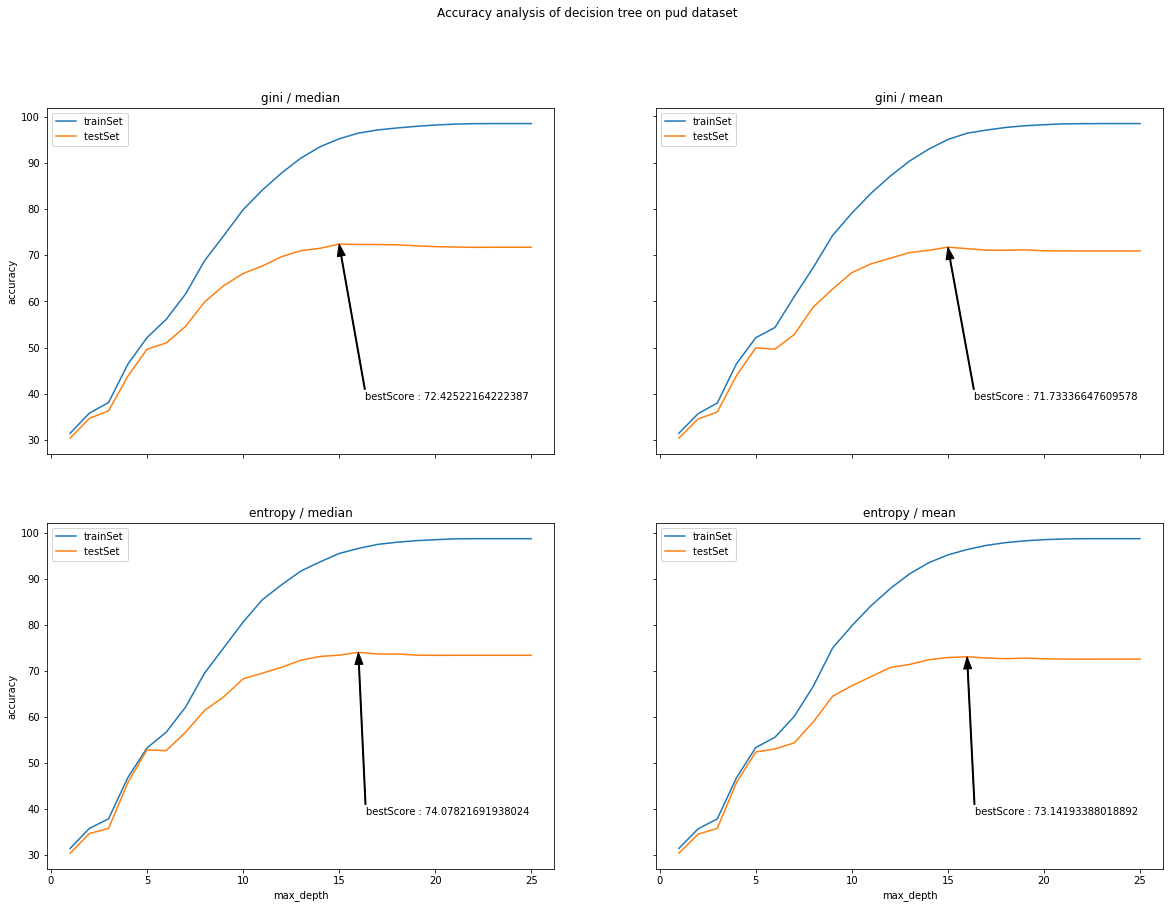

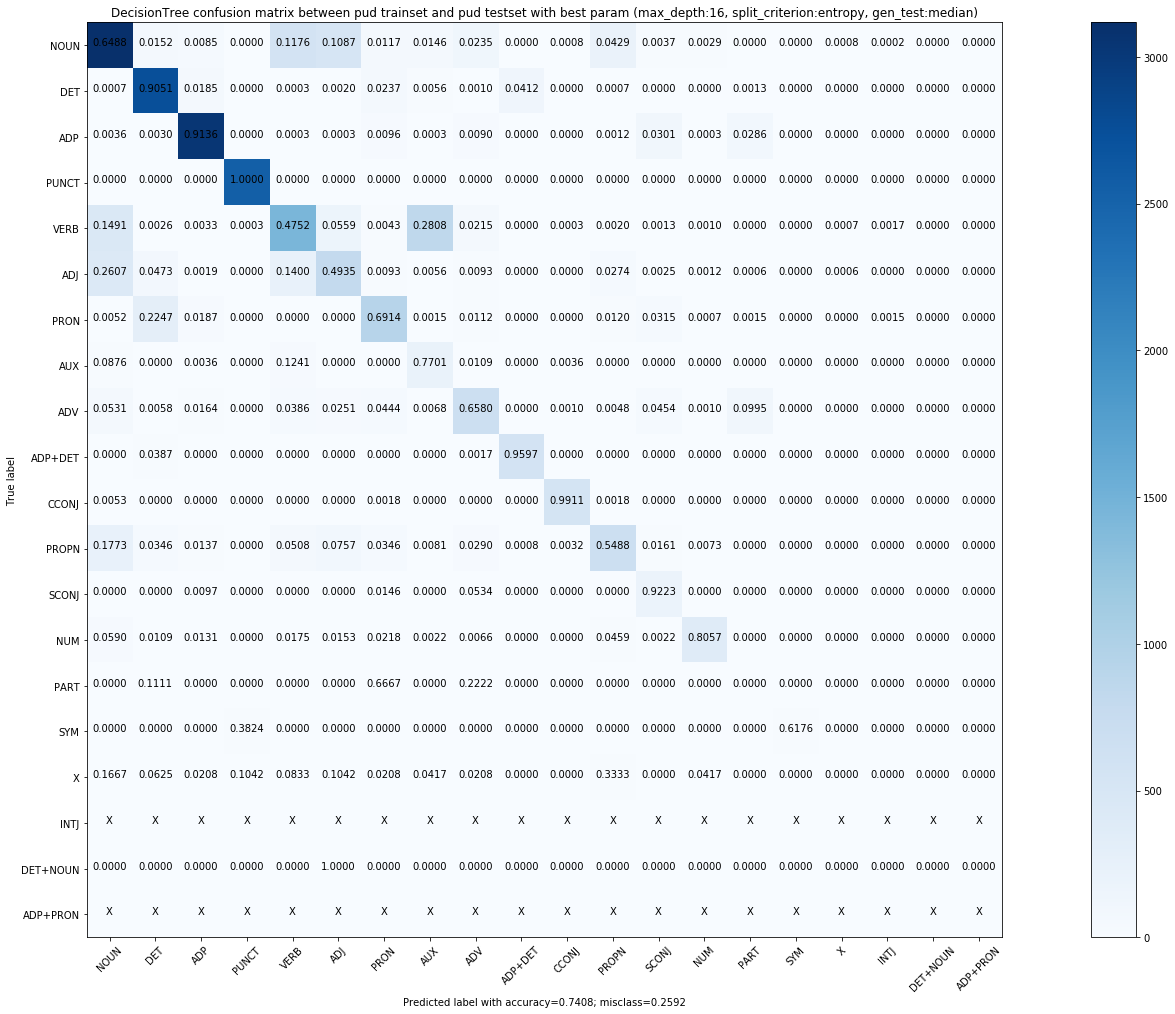

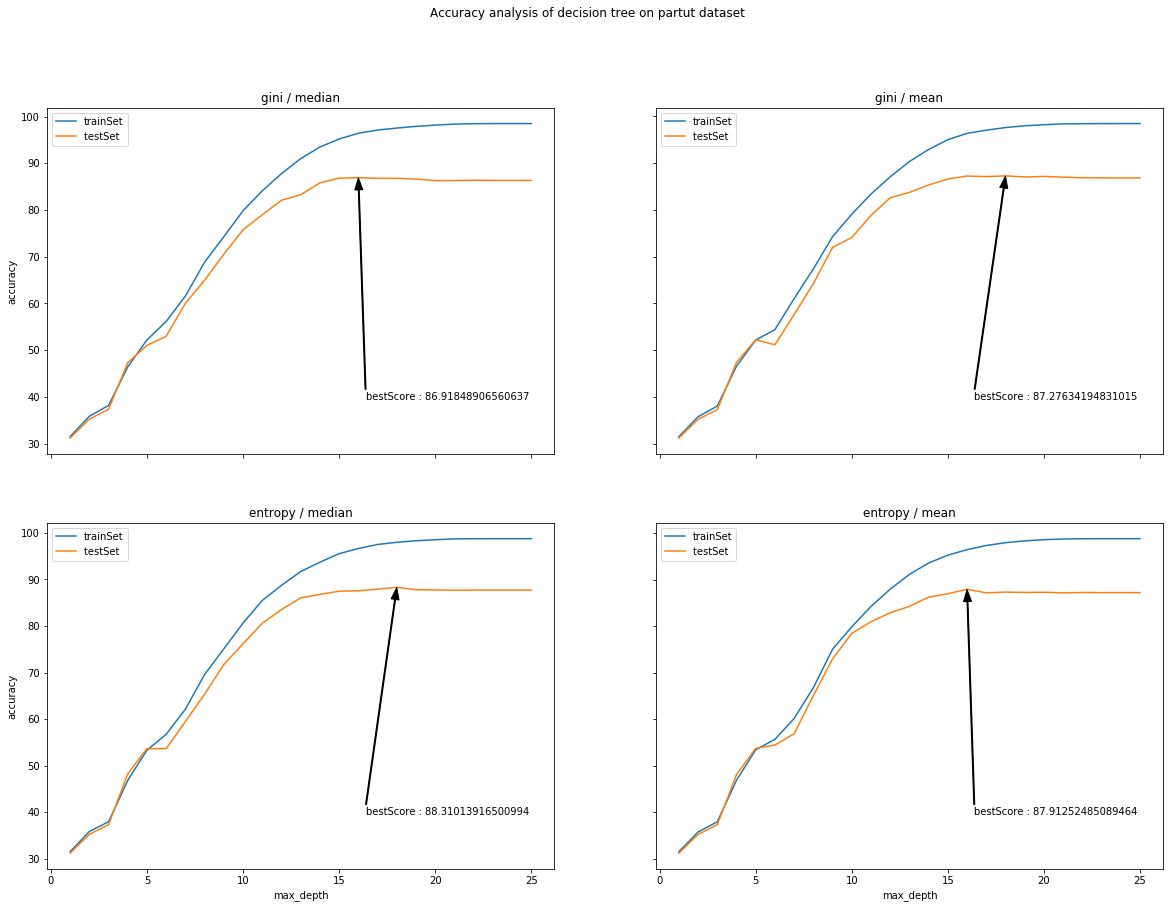

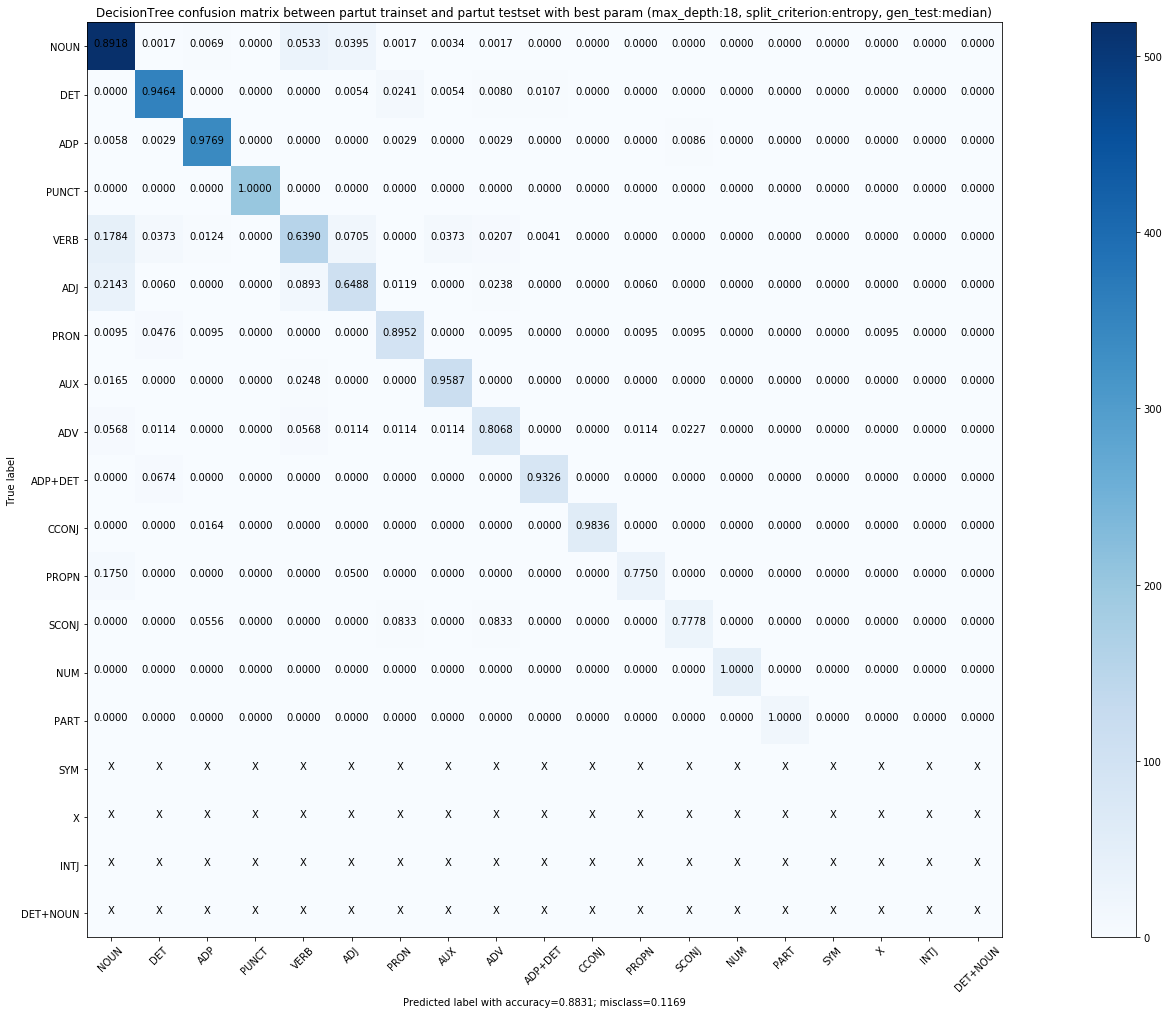

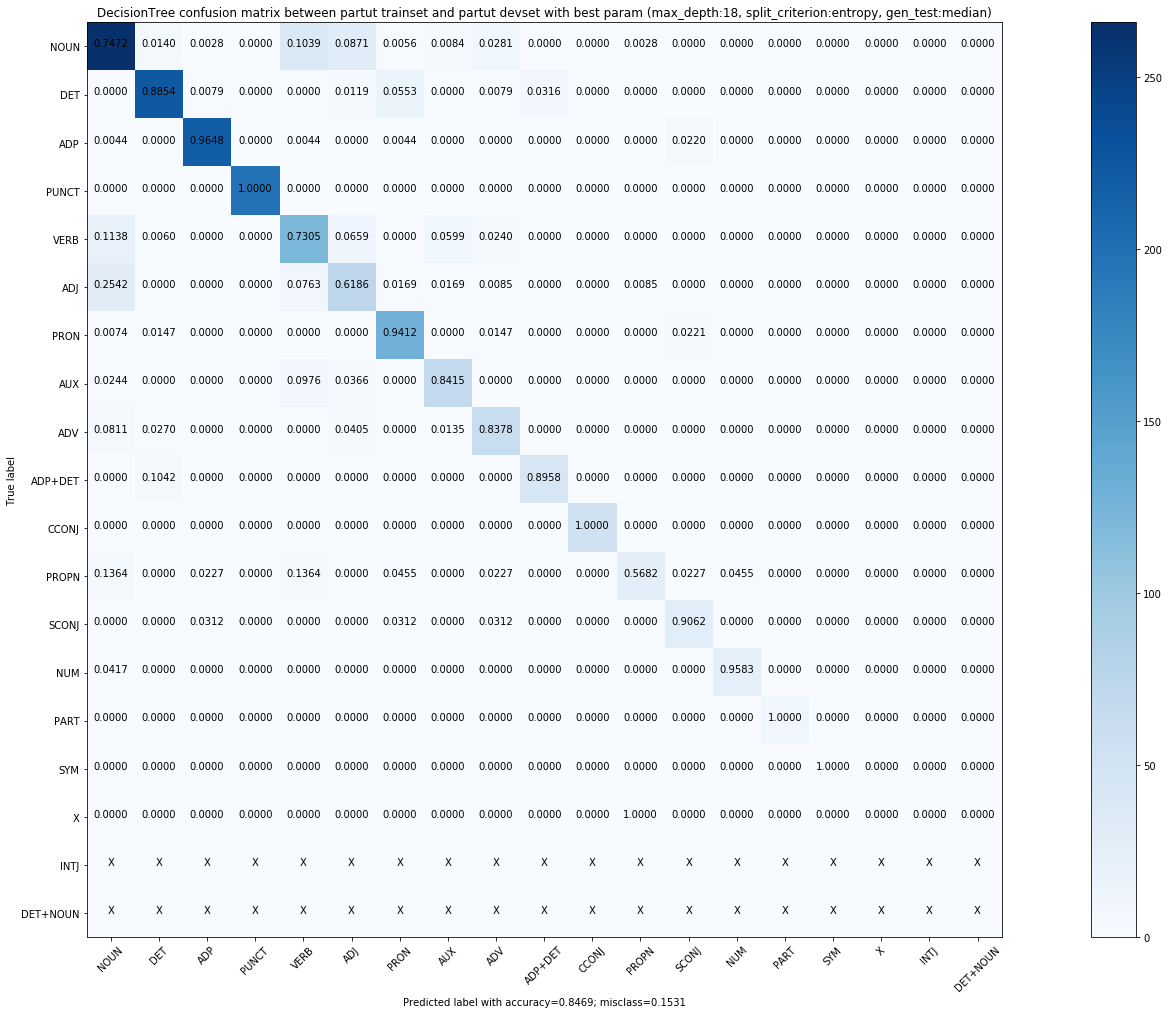

In [4]:
# temps de calcul de cette cellule très long en raison du parcours de l'ensemble des corpus
# pour la validation croisé
for namedataset, _ in da.listeCorpus.items():
    if namedataset not in ["gsd", "ftb"]:
        ma.analyzeDecisionTree(namedataset, verbose=True)

Beginning of the model analysis between  gsd  train and  gsd  test
split_criterion :  gini  / gen_test :  median
      training time :  1.0778472423553467
      Max depth :  1 score on train :  30.61514337307143   Actual score on test :  31.27694518579347  Highscore !!
      training time :  2.2950222492218018
      Max depth :  2 score on train :  37.10685808196308   Actual score on test :  35.43420242250052  Highscore !!
      training time :  2.924933433532715
      Max depth :  3 score on train :  40.263587326707416   Actual score on test :  37.90802709915828  Highscore !!
      training time :  4.321322917938232
      Max depth :  4 score on train :  44.61101014756137   Actual score on test :  41.53151303633751  Highscore !!
      training time :  4.813659191131592
      Max depth :  5 score on train :  49.06451715752343   Actual score on test :  46.0480394169575  Highscore !!
      training time :  6.019529581069946
      Max depth :  6 score on train :  53.76671333211598   Actua

      training time :  2.692687511444092
      Max depth :  3 score on train :  42.126437281346284   Actual score on test :  39.38616300554301  Highscore !!
      training time :  3.4790124893188477
      Max depth :  4 score on train :  48.464242961777806   Actual score on test :  45.43214945596387  Highscore !!
      training time :  4.256723403930664
      Max depth :  5 score on train :  52.55080302252985   Actual score on test :  49.46622870047218  Highscore !!
      training time :  5.073183536529541
      Max depth :  6 score on train :  56.83590862847056   Actual score on test :  53.43871894888114  Highscore !!
      training time :  5.87331748008728
      Max depth :  7 score on train :  62.48126860458713   Actual score on test :  59.06384725928967  Highscore !!
      training time :  6.826264142990112
      Max depth :  8 score on train :  67.99358857305172   Actual score on test :  65.06877437897762  Highscore !!
      training time :  7.897583484649658
      Max depth :  9 

/home/fusroman/Documents/Informatique_et_Programmation/Intelligence Artificielle/M1_Intro_machine_learning/Projet/src/modelAnalysis.py:238: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


score on devDataSet gsd is 91.57915993537964 with best param (20, 'entropy', 'median')
decisionTreeAnalysis on gsd finished in 6880.398337125778 secondes
results graph can be shown in ../results/decisionTree/ location
Beginning of the model analysis between  ftb  train and  ftb  test
split_criterion :  gini  / gen_test :  median
      training time :  1.3632848262786865
      Max depth :  1 score on train :  33.97975704840037   Actual score on test :  33.81908275944747  Highscore !!
      training time :  2.932847261428833
      Max depth :  2 score on train :  38.10884882911078   Actual score on test :  37.55411399571084  Highscore !!
      training time :  3.922985076904297
      Max depth :  3 score on train :  43.54292355979268   Actual score on test :  43.72410853435989  Highscore !!
      training time :  5.5347137451171875
      Max depth :  4 score on train :  49.37000823104824   Actual score on test :  49.23074873789511  Highscore !!
      training time :  6.291670322418213
  

KeyboardInterrupt: 

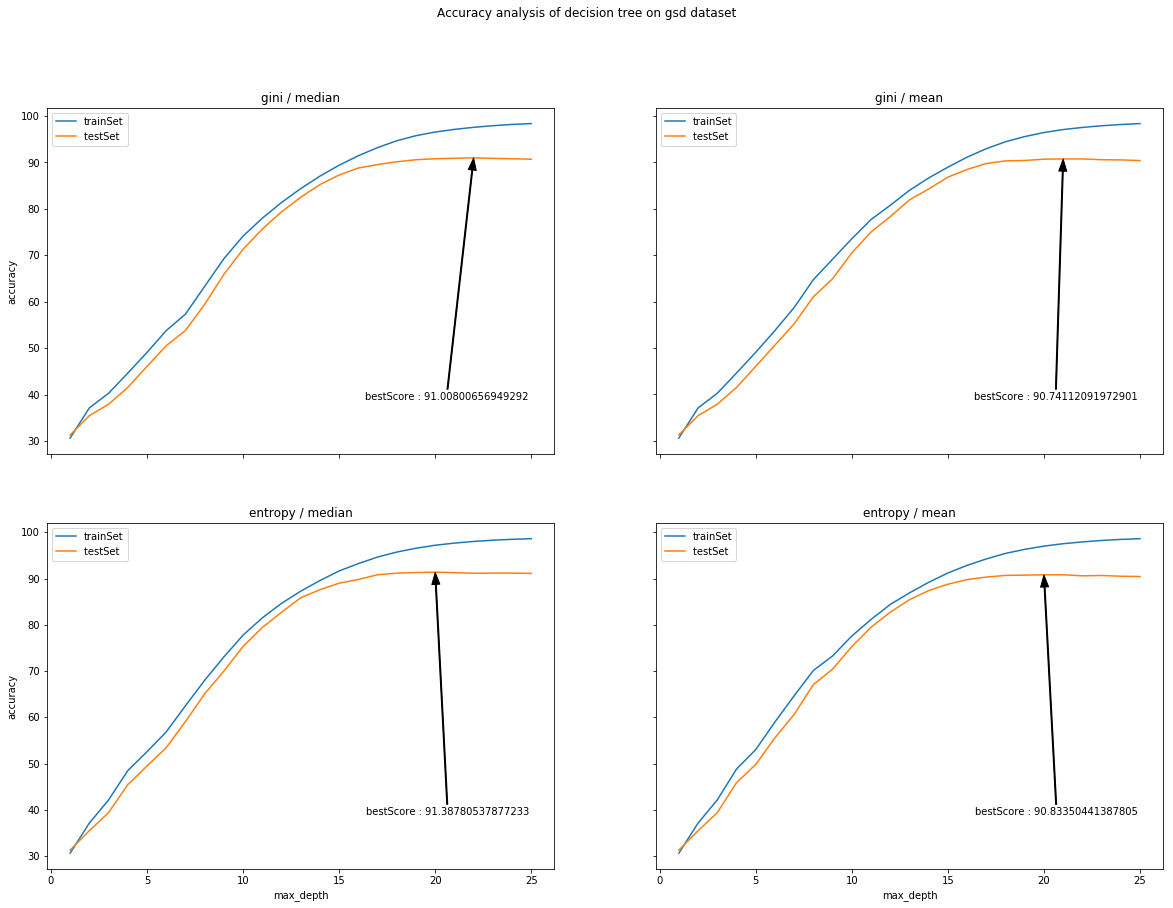

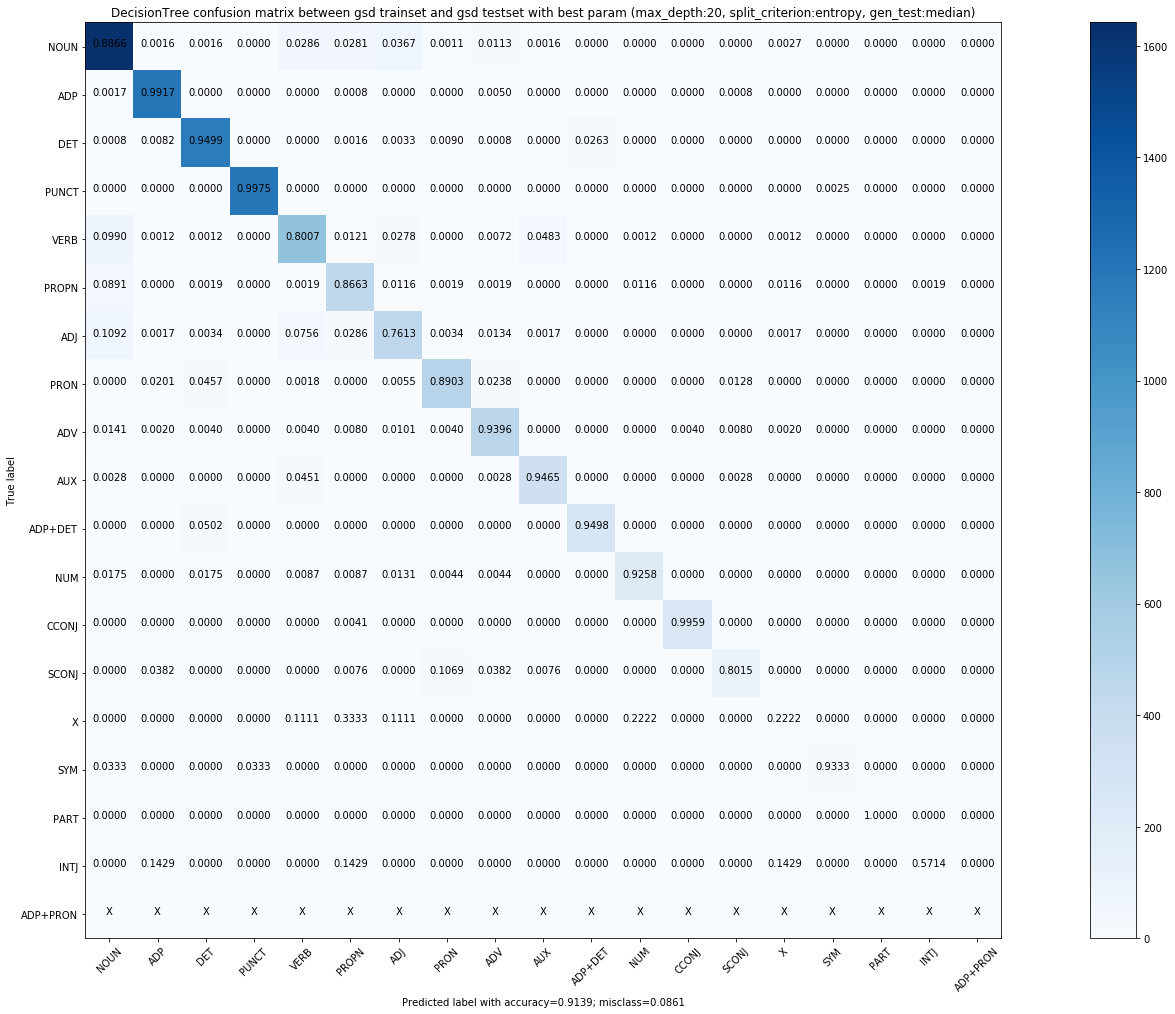

Error in callback <function flush_figures at 0x7f0e59a7b510> (for post_execute):


KeyboardInterrupt: 

In [5]:
# temps de calcul de cette cellule très long en raison des deux plus gros ensemble
for namedataset, _ in da.listeCorpus.items():
    if namedataset in ["gsd", "ftb"]:
        ma.analyzeDecisionTree(namedataset, verbose=True)

### Analyse du changement de contexte avec les meilleurs hyper-paramètres

In [10]:
footTest = da.listeCorpus["foot"].testDataSet
natdisTest = da.listeCorpus["natdis"].testDataSet

Xfoot, Yfoot = ft.buildFeature(footTest)
Xnatdis, Ynatdis = ft.buildFeature(natdisTest)

debut partut


/home/fusroman/Documents/Informatique_et_Programmation/Intelligence Artificielle/M1_Intro_machine_learning/Projet/src/modelAnalysis.py:238: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


fin partut
debut pud
fin pud
debut sequoia
fin sequoia
debut spoken
fin spoken
debut gsd
fin gsd


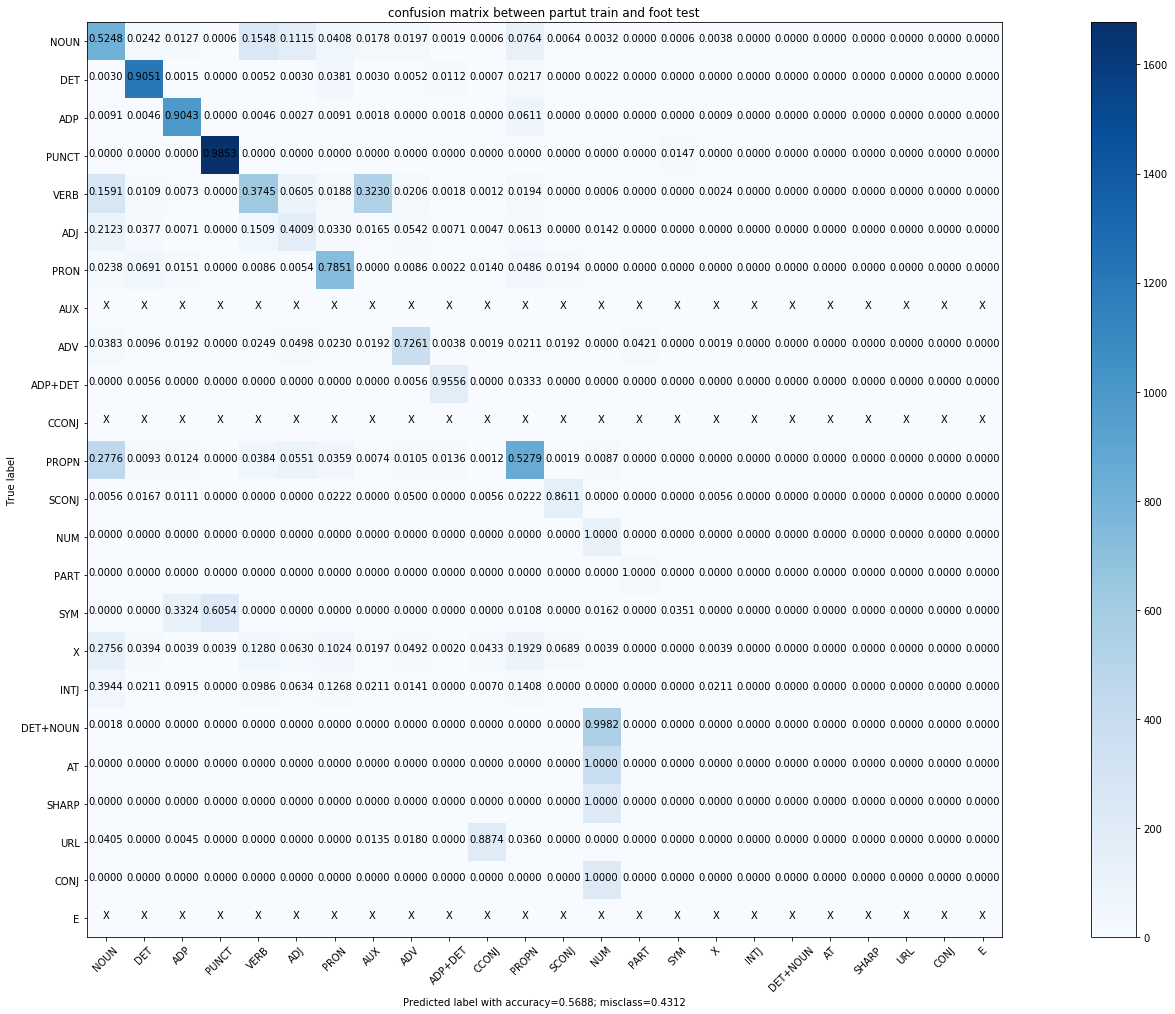

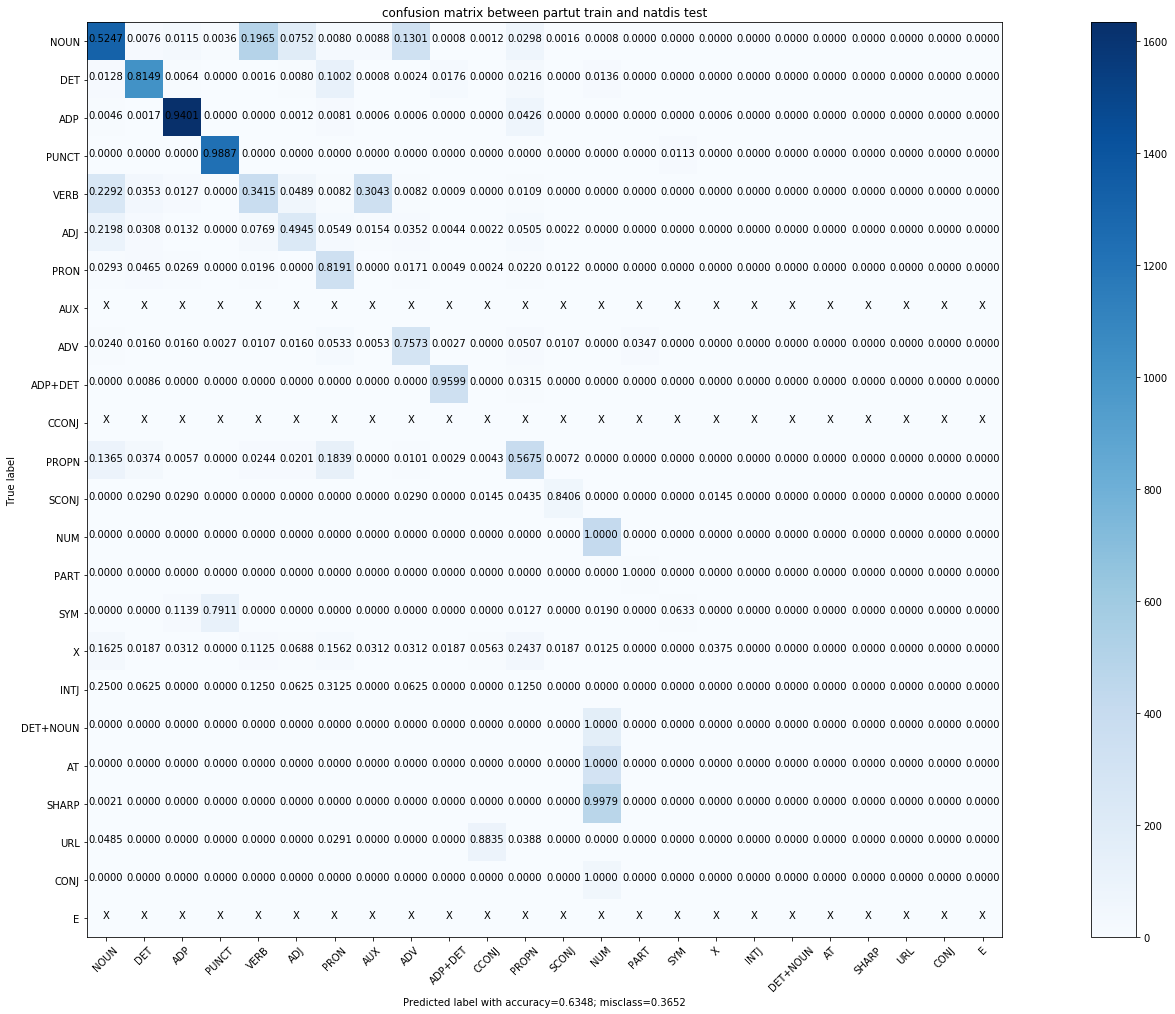

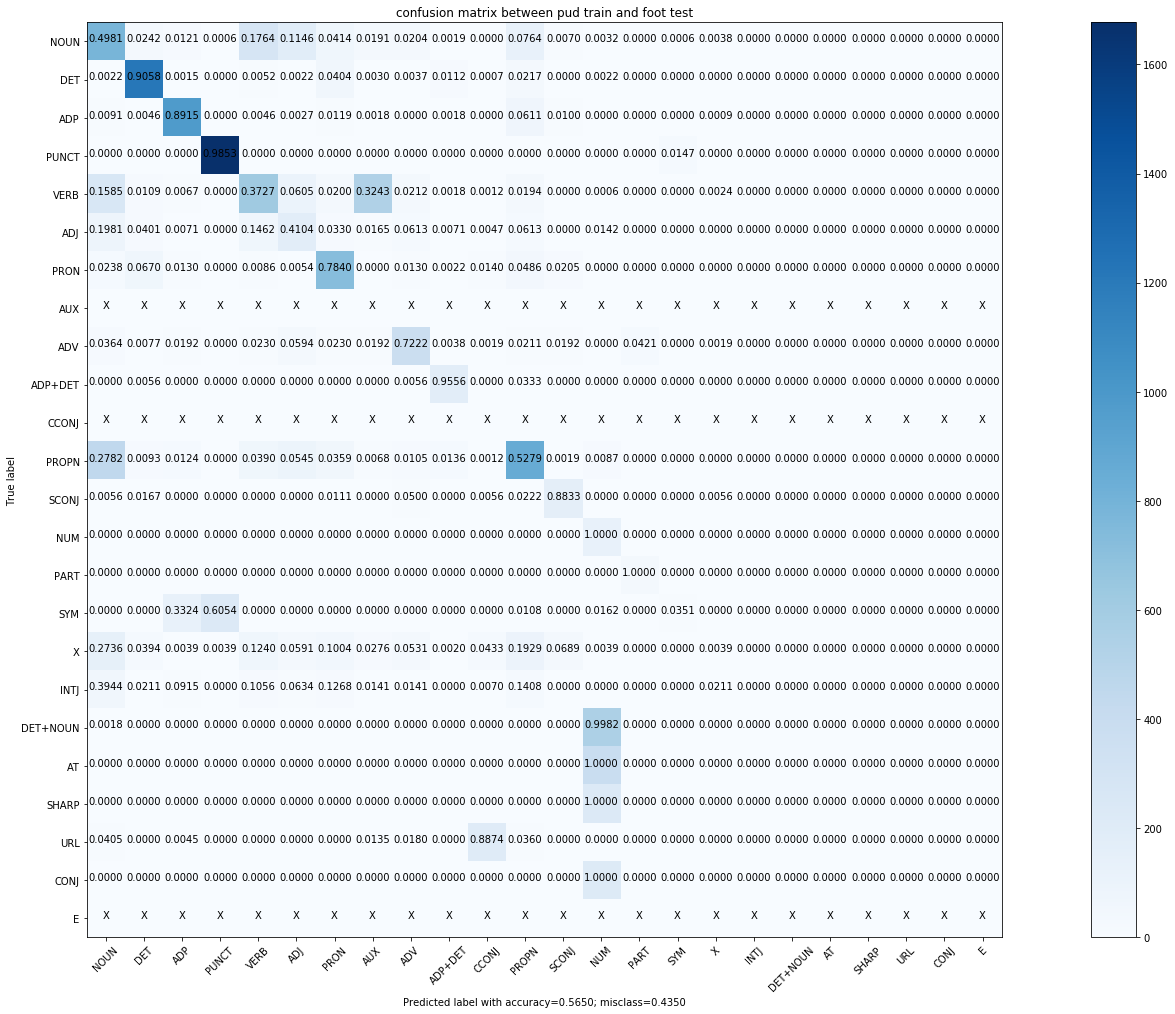

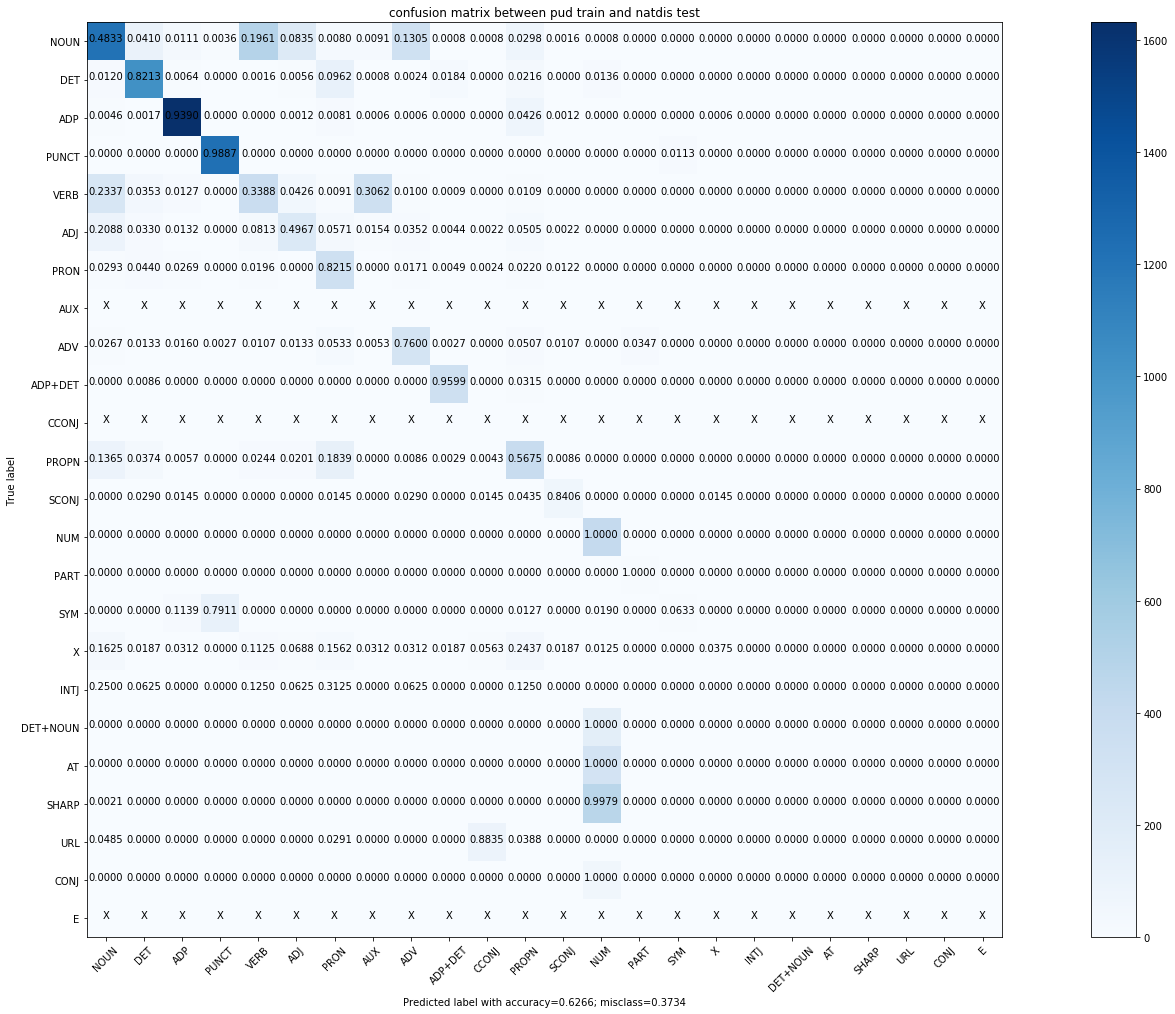

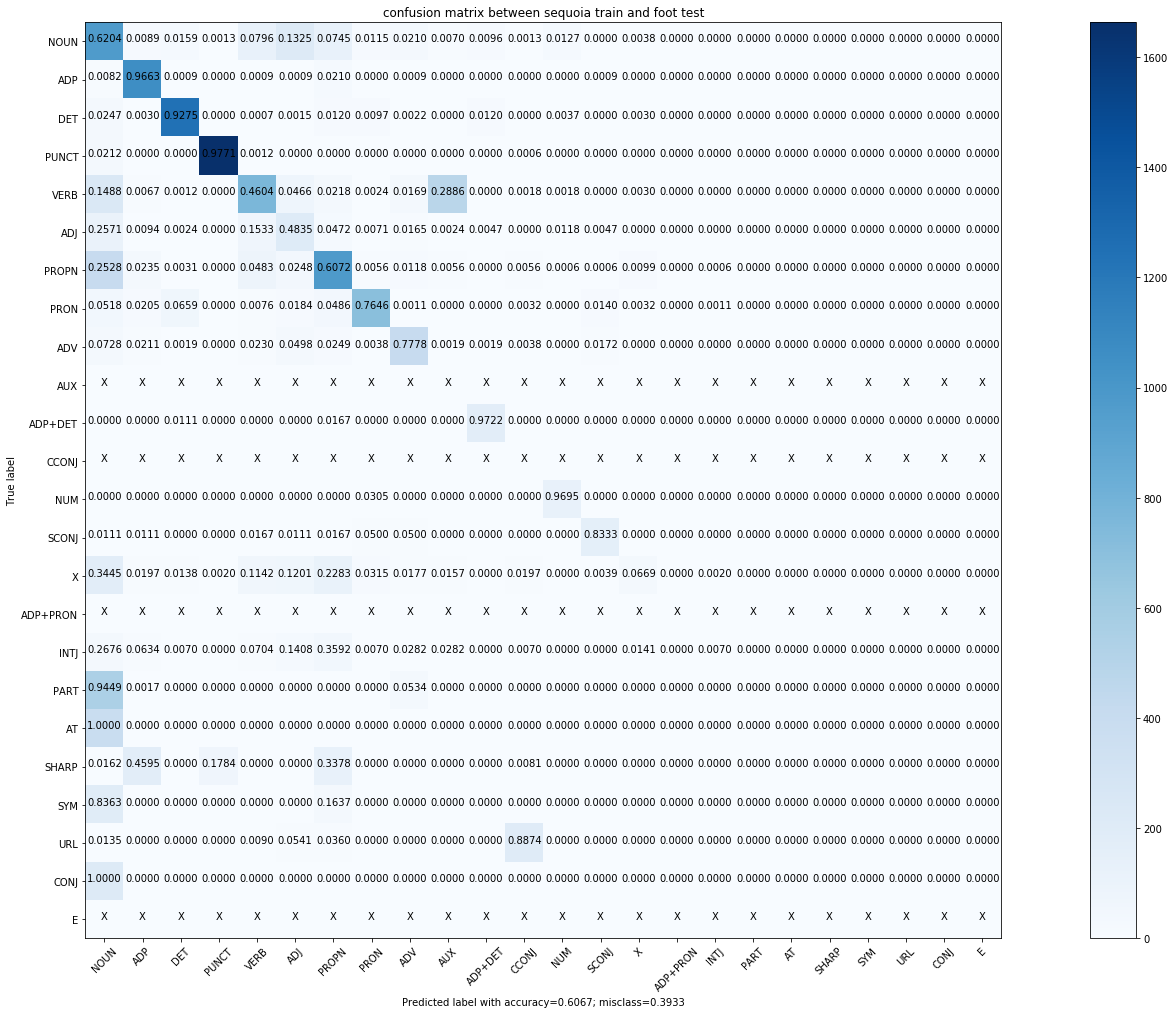

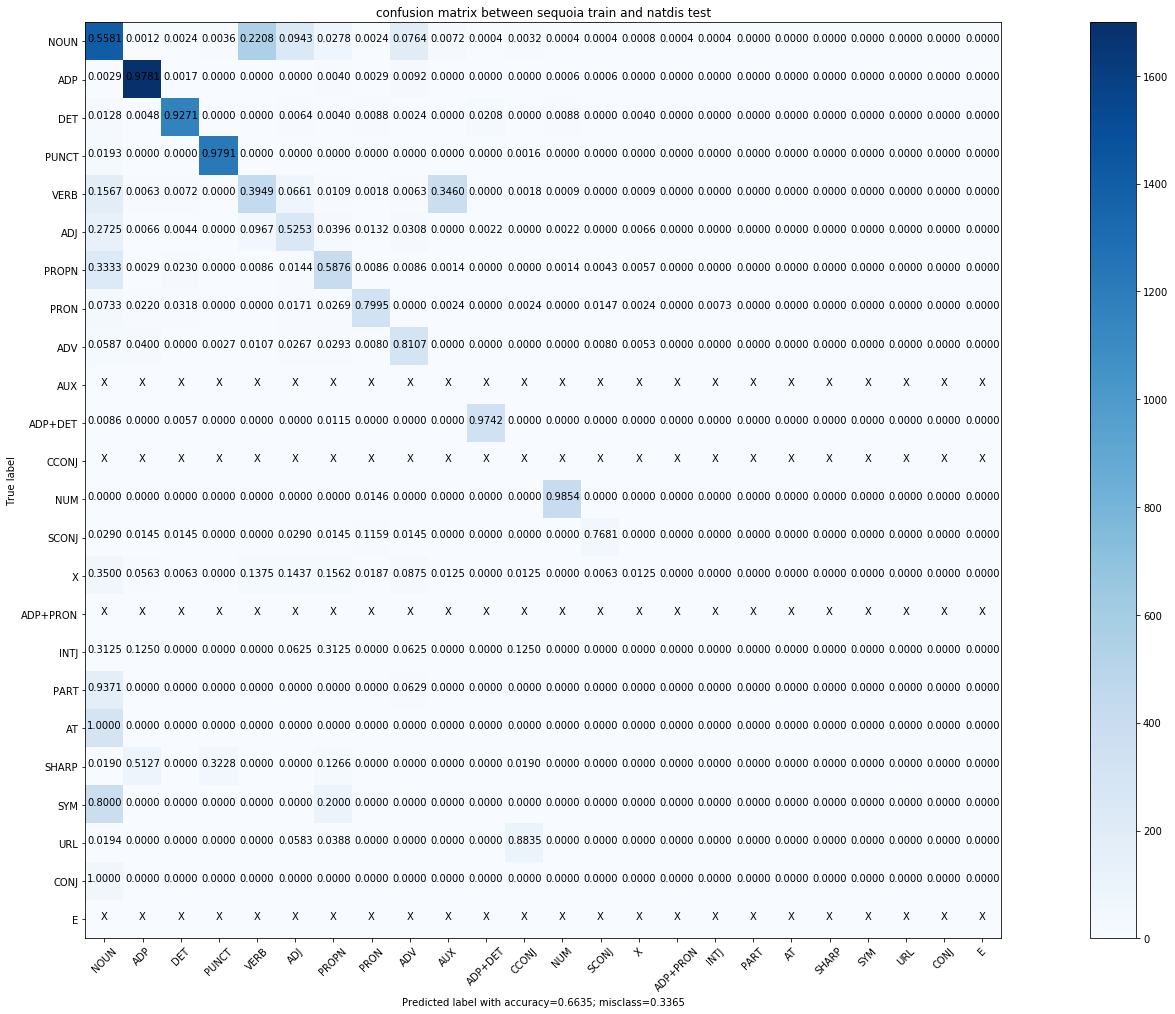

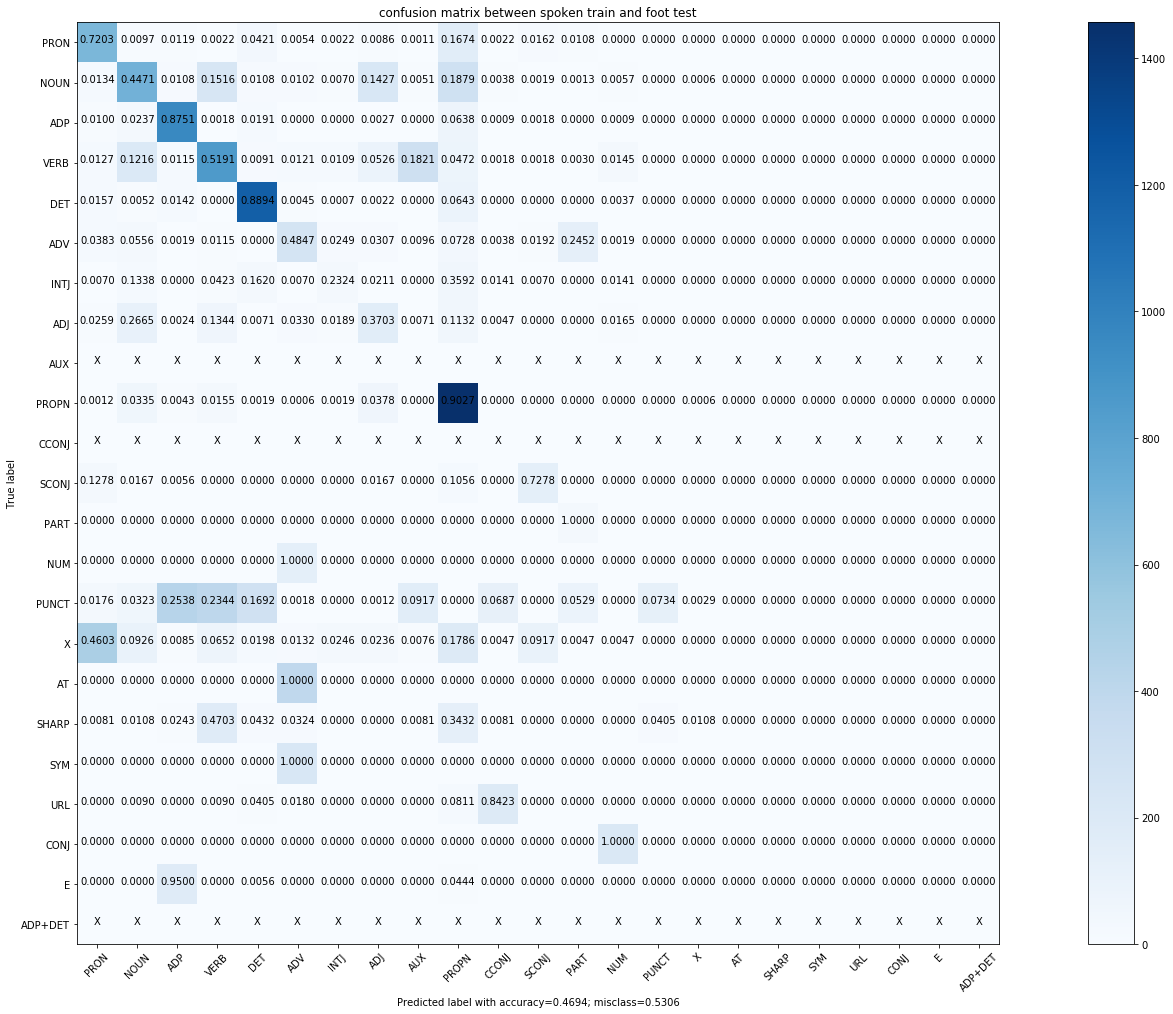

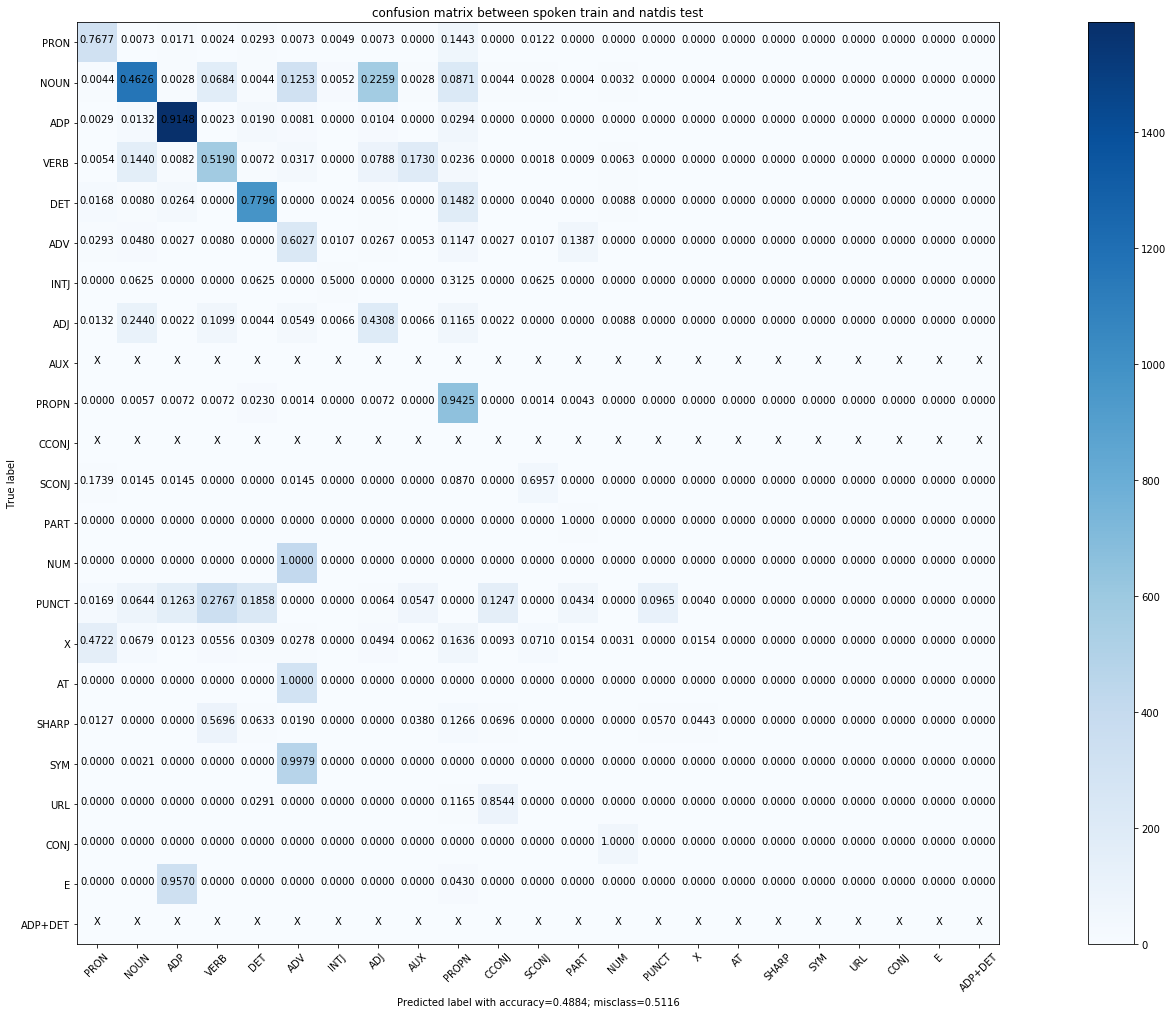

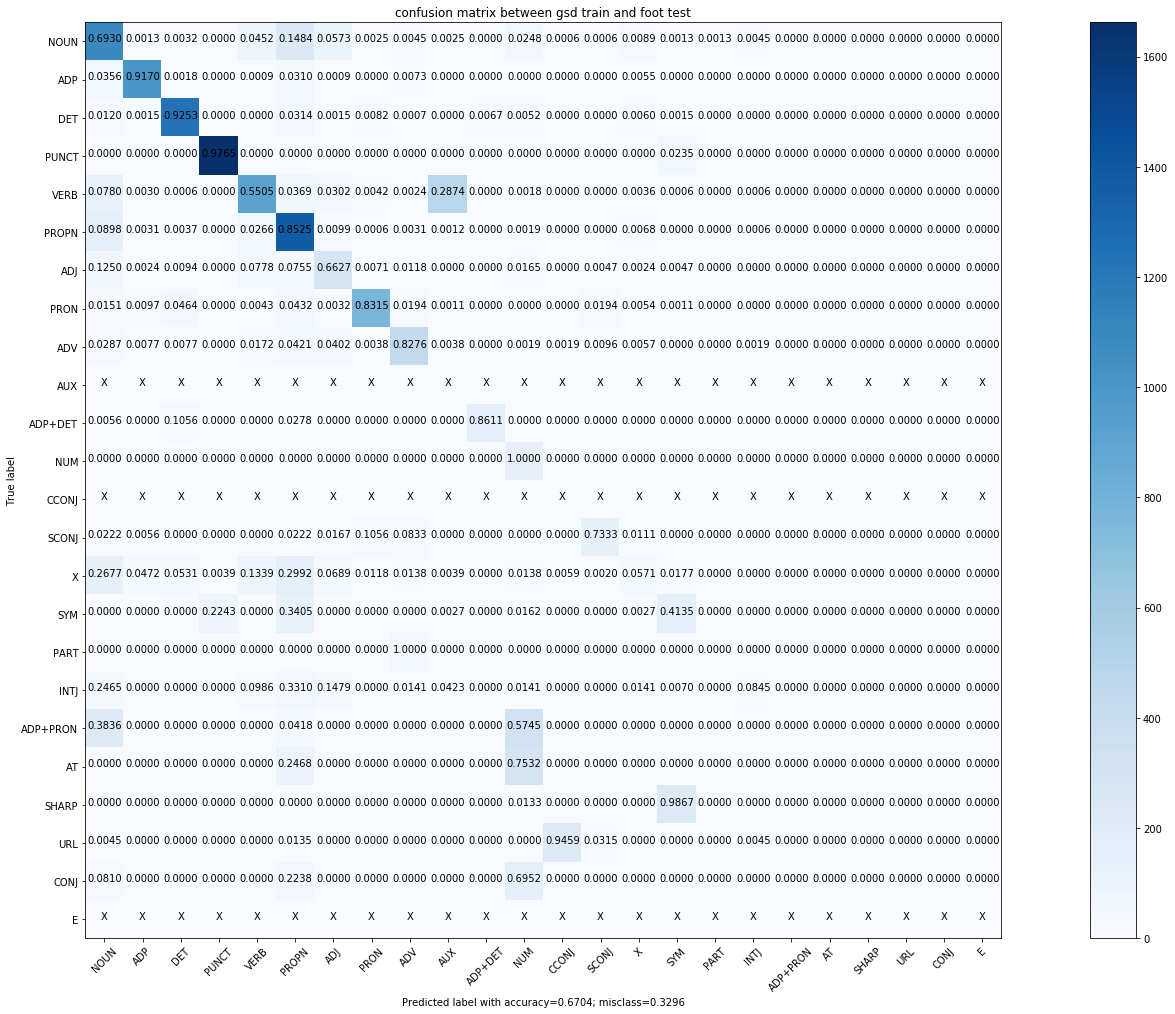

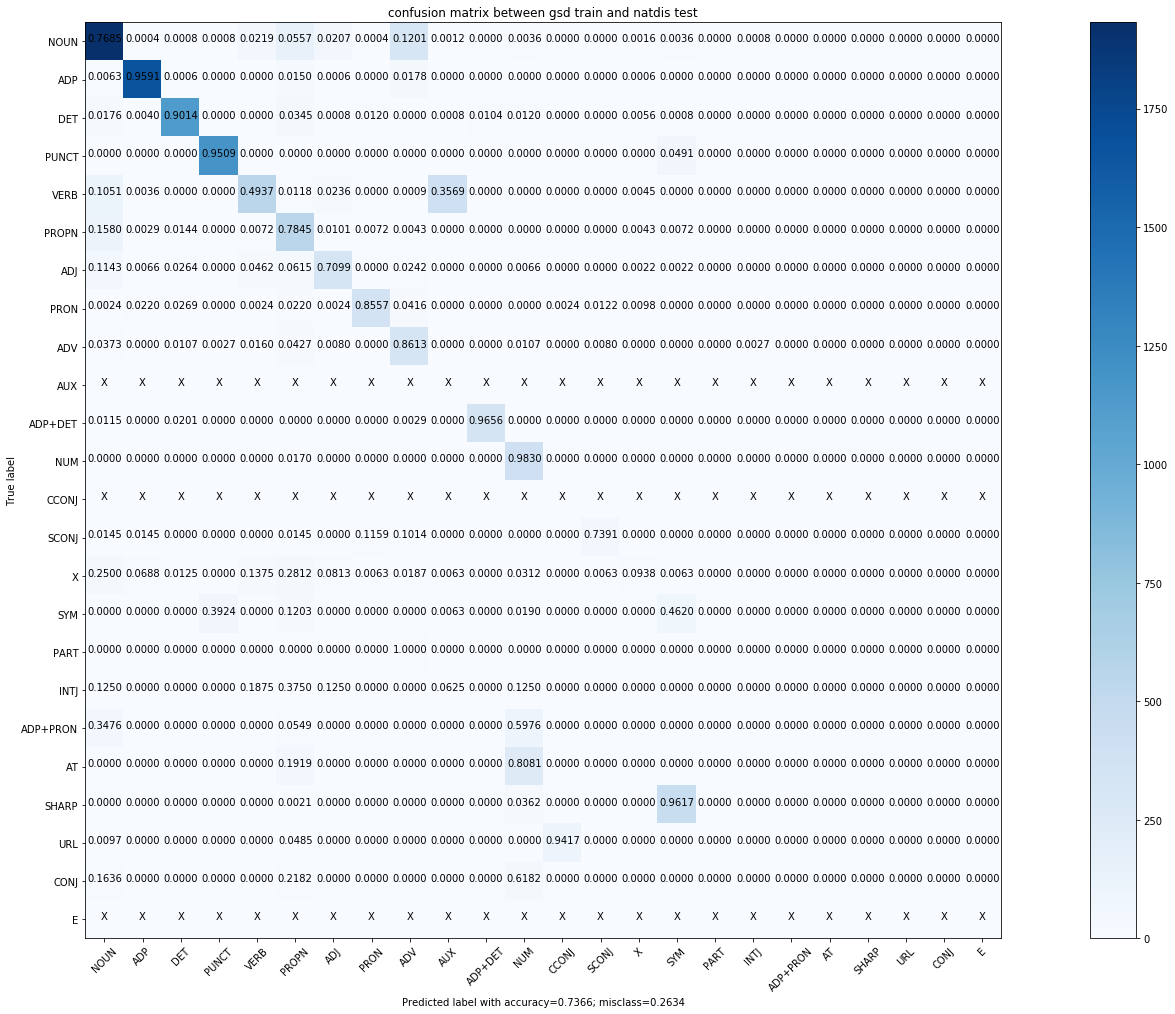

In [11]:
corpus = ["partut", "pud", "sequoia", "spoken", "gsd"]
# meilleur paramètre de chacun des corpus récupéré par validation croisé ci-dessus
bestParam = [(15, "entropy", "mean"), (16, "entropy", "mean"), 
             (17, "entropy", "median"), (15, "entropy", "mean"),
             (20, "entropy", "median")]

for nameDataset, (max_depth, split_criterion, gen_test) in zip(corpus, bestParam):
    print("debut " + nameDataset)
    train = da.listeCorpus[nameDataset].trainDataSet
    Xtrain, Ytrain = ft.buildFeature(train)

    
    decisionTree = dtree.DecisionTreeClassifier(Xtrain, Ytrain, 
                                                max_depth=max_depth, 
                                                split_criterion=split_criterion, 
                                                gen_test=gen_test)
    tree = decisionTree.fit()
    
    scoreFoot, cm_foot = decisionTree.modelScore(tree, Xfoot, Yfoot)
    scoreNatdis, cm_natdis = decisionTree.modelScore(tree, Xnatdis, Ynatdis)
    
    cm_foot_fig = ma.showConfusionMatrix(
            cm_foot, decisionTree.classLabel.keys(), title="confusion matrix between " + nameDataset + " train and foot test")
    
    cm_natdis_fig = ma.showConfusionMatrix(
            cm_natdis, decisionTree.classLabel.keys(), title="confusion matrix between " + nameDataset + " train and natdis test")
    
    cm_foot_fig.savefig("../results/decisionTree/confusion_matrix_foot_" + nameDataset)
    cm_natdis_fig.savefig("../results/decisionTree/confusion_matrix_natdis_" + nameDataset)
    
    print("fin " + nameDataset)

## Naive Bayes Classifier

In [ ]:
import NaiveBayesClassifier as naivebc

naiveBC = naivebc.NaiveBayesClassifier(Xtrain, Ytrain)

In [ ]:
naiveBC.fit()

In [ ]:
score, cm = naiveBC.modelScore(Xtest, Ytest)

In [ ]:
print(score)

In [ ]:
ma.showConfusionMatrix(cm, decisionTree.classLabel.keys())

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
Xtrain, Ytrain = ft.buildFeature(trainSet, lambda x:x)
Xtest, Ytest = ft.buildFeature(testSet, lambda x:x)


clf = MultinomialNB()
clf.fit(trainSet, testSet)

In [ ]:
clf.score(Xtest, Ytest)